In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from peakfit import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test peak fit

## Implemented peak functions

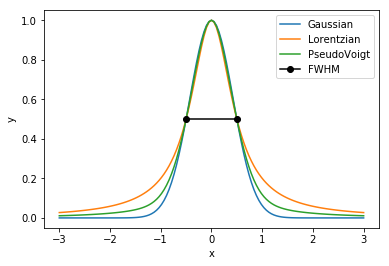

In [36]:
x = np.linspace(-3, 3, 123)

f = Gauss()
plt.plot(x, f(x, 0, 1, 1), label=f.name);

f = Lorentzian()
plt.plot(x, f(x, 0, 1, 1), label=f.name);

f = PseudoVoigt()
plt.plot(x, f(x, 0, 1, 1, 0.5), label=f.name);


plt.plot([-.5, .5], [.5, .5], '-ok', label='FWHM'); # test FWHM
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Simple fit

{'x0': 0.4826205117945617, 'fwhm': 1.038769301362242, 'amplitude': 0.9584769391440808}
{'slope': -0.0018921240405704255, 'intercept': 7.000735815312386}


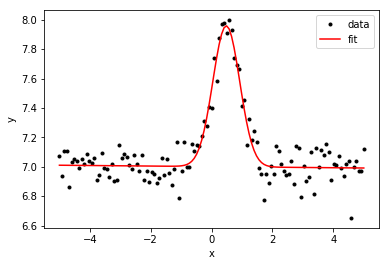

In [9]:
# Generate random data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Gauss())

# _note:_ a linear slope is by default included
# set background=None to prevent this

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## With a linear background

{'x0': 0.504746944464846, 'fwhm': 1.0070487434191184, 'amplitude': 1.0332987544409242}
{'slope': 0.09912139001025223, 'intercept': 6.991134234233395}


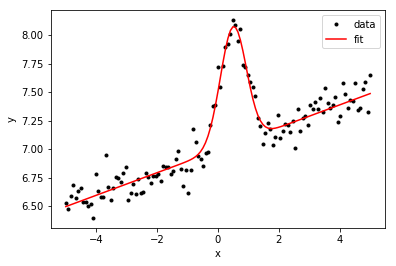

In [10]:
# Generate random data data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using manual estimation of initial parameters:
results, fit = peakfit(x, y, Gauss(0, 1, 1))

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

{'x0': 0.5499983854839833, 'fwhm': 0.9786441709701841, 'amplitude': 1.0935852941191284}


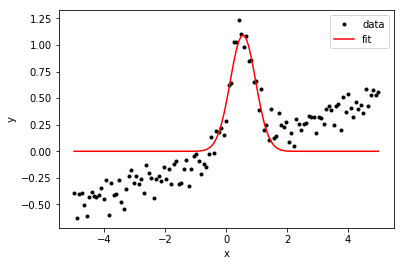

In [11]:
# Generate data
x = np.linspace(-5, 5, 123)
y = 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit without the linear background:
results, fit = peakfit(x, y, Gauss(0.6, 1, 1), background=None)

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Multi-peak

{'x0': -1.4962016511805953, 'fwhm': 1.555324325423675, 'amplitude': 1.0127438345231972}
{'x0': 0.4953884241756696, 'fwhm': 1.0022341026062347, 'amplitude': 0.8037815867506556}
{'slope': 0.0005132780747019255, 'intercept': -0.013013015685664224}


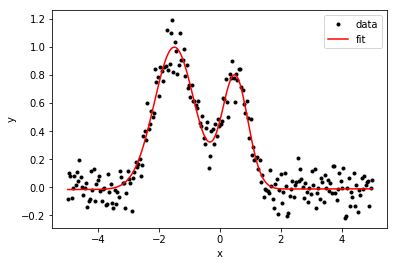

In [12]:
# Generate random data
x = np.linspace(-5, 5, 234)
y = 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 0.8)
y += Gauss()(x, -1.5, 1.5, 1.)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Sum(Gauss(-2, 1, 1), Gauss(1, 1, 1)))

for r in results:
    print(r)
    
# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Pseudo Voigt

{'x0': 0.39861593372083826, 'fwhm': 1.0142585789031708, 'amplitude': 0.9993063239872931, 'eta': 0.37700344581982675}


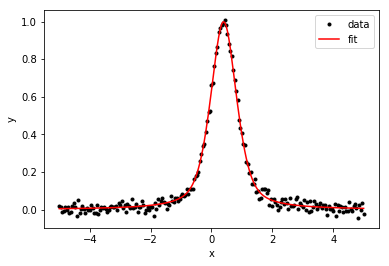

In [32]:
# Generate random data
x = np.linspace(-5, 5, 211)
y = 0.02*np.random.randn(*x.shape)
y += PseudoVoigt()(x, 0.4, 1, 1, 0.4)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, PseudoVoigt(), background=None)

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();